In [1]:
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [6]:
file_path = "/kaggle/input/stock-dataset/Sample PNL (Jan-Feb2021 - Global).xlsx"

In [7]:
df1 = pd.read_excel(file_path,sheet_name='Hit Ratio',header=2)
df2 = pd.read_excel(file_path,sheet_name='list of market',header=3)
df2.fillna(0,inplace=True)
df3 = pd.read_excel(file_path,sheet_name='expectancy',header=0)

In [8]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['Row Labels', 'Sum of Trade Count', 'Sum of winflag',
       'Sum of Hit Ratio'],
      dtype='object')
Index(['Row Labels', 'long', 'short', 'Grand Total'], dtype='object')
Index(['Market', 'Win', 'Loss', 'AvgWinR', 'AvgLossR', 'Hit Ratio',
       'Loss Ratio', 'Expectancy'],
      dtype='object')


In [9]:
df1 = df1[df1['Row Labels'] != 'Grand Total'] #remove total
df2 = df2[df2['Row Labels'] != 'Grand Total']

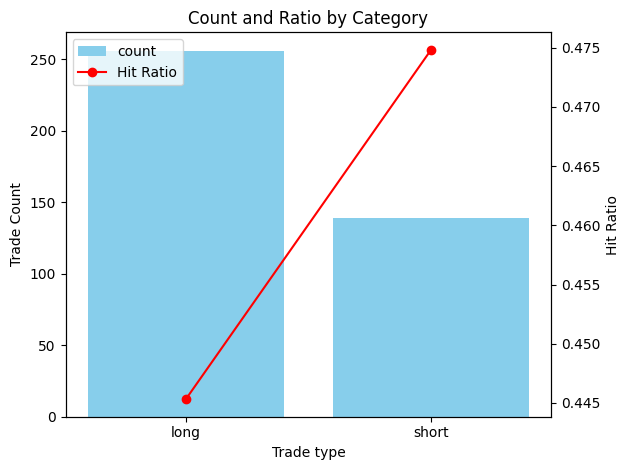

In [10]:
fig,ax1=plt.subplots()

ax1.bar(df1['Row Labels'],df1['Sum of Trade Count'],color='skyblue', label= 'count')
ax1.set_ylabel('Trade Count')
ax1.set_xlabel('Trade type')

ax2=ax1.twinx()
ax2.plot(df1['Row Labels'],df1['Sum of Hit Ratio'],color='red', marker='o', label='Hit Ratio')
ax2.set_ylabel('Hit Ratio')

lines_1, labels_1=ax1.get_legend_handles_labels()
lines_2, labels_2=ax2.get_legend_handles_labels()
ax1.legend(lines_1+lines_2,labels_1+labels_2,loc='upper left')

plt.title('Count and Ratio by Category')
plt.tight_layout()
plt.show()


* Over 65% of entire trades is long position, it reflects the expectation of a rise in the market.
* However, Hit Ratio is lower(47%) then short position.
* need to change the product of long position or the weight to short position
* need to consider expectancy


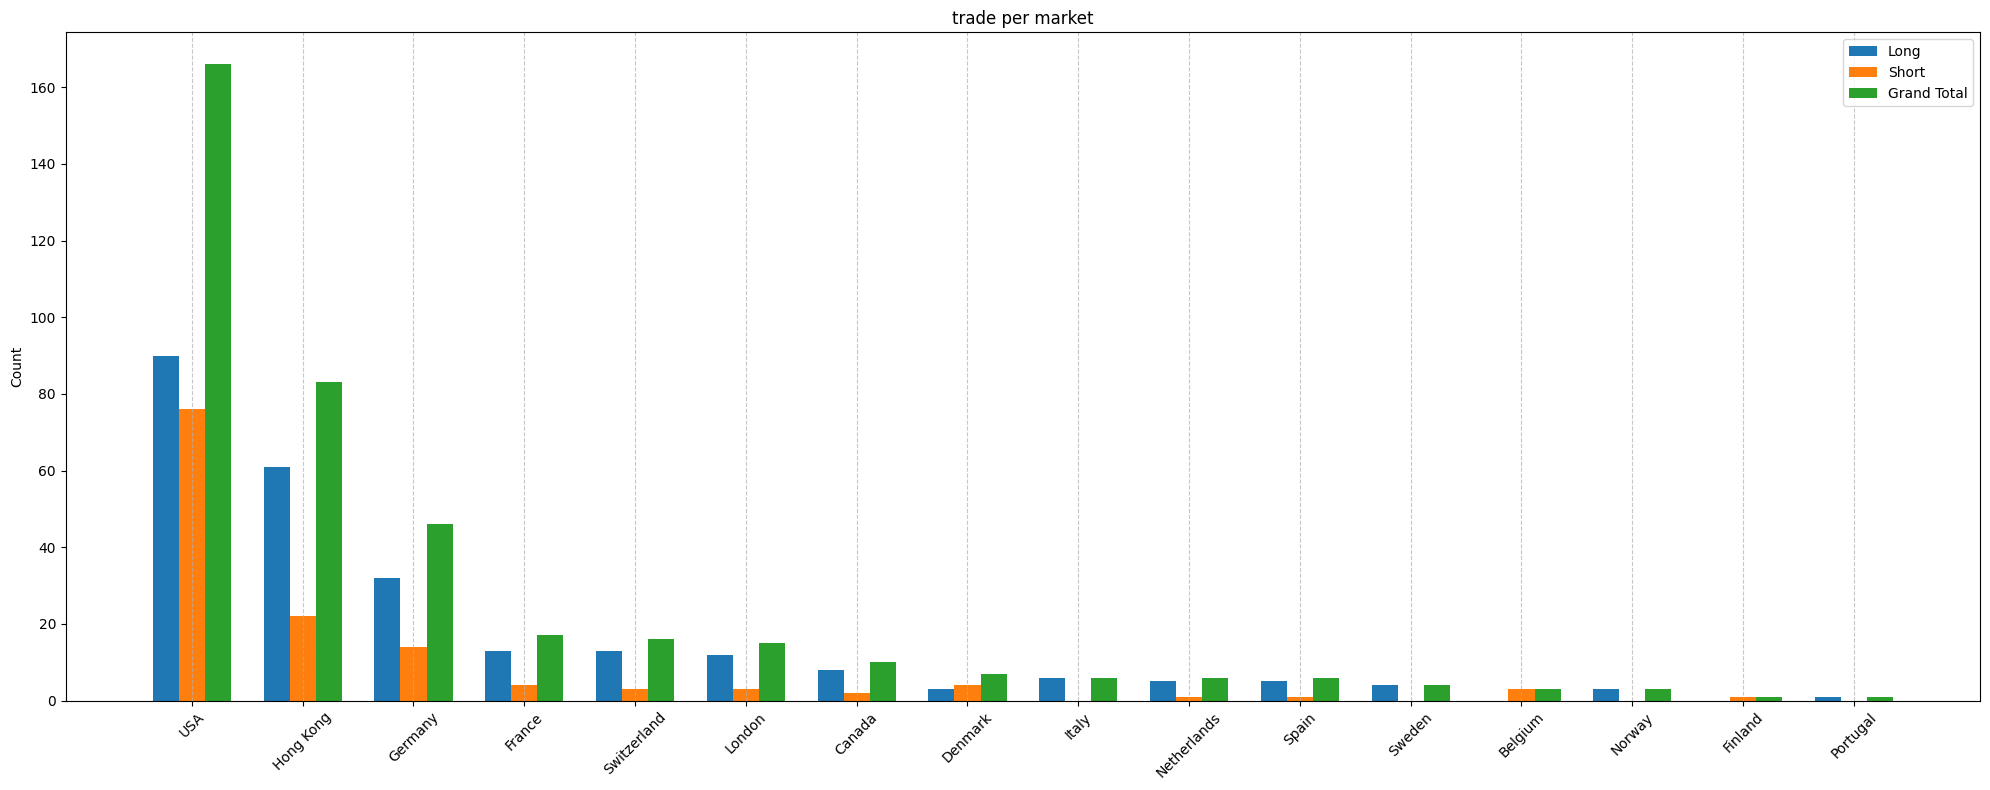

In [11]:
#arranged by Grand Total
df2_sorted = df2.sort_values(by='Grand Total', ascending=False).reset_index(drop=True)
gap = 1.7
x = np.arange(len(df2['Row Labels']))*gap
width = 0.4

plt.figure(figsize=(20, 8))
plt.title('trade per market')
plt.bar(x - width, df2_sorted['long'], width, label='Long')
plt.bar(x, df2_sorted['short'], width, label='Short')
plt.bar(x + width, df2_sorted['Grand Total'], width, label='Grand Total')

plt.xticks(x, df2_sorted['Row Labels'], rotation=45)
plt.ylabel('Count')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
dfE=df3[['Market','Win','Loss','Expectancy']]
print(dfE.head)

<bound method NDFrame.head of          Market  Win  Loss  Expectancy
0     Hong Kong   34    49        0.79
1   Switzerland    8     8        0.58
2       Germany   25    21        0.69
3        France   10     7        0.97
4         Italy    3     3        0.43
5   Netherlands    4     2        0.51
6         Spain    3     3        1.10
7       Finland    0     1        0.65
8        Sweden    1     3        0.51
9       Denmark    2     5        0.44
10       Norway    1     2        0.58
11       London    4    11        0.53
12      Belgium    3     0        0.76
13     Portugal    0     1        0.29
14          USA   73    93        1.18
15       Canada    7     3        2.05>


In [13]:
df3_fillter=df3[df3['Expectancy']>0.50][['Market','AvgWinR','AvgLossR','Expectancy']]
print(df3_fillter.head)

<bound method NDFrame.head of          Market  AvgWinR  AvgLossR  Expectancy
0     Hong Kong     0.94     -0.68        0.79
1   Switzerland     0.62     -0.53        0.58
2       Germany     0.74     -0.63        0.69
3        France     0.95     -1.01        0.97
5   Netherlands     0.50     -0.53        0.51
6         Spain     1.17     -1.03        1.10
7       Finland     0.00     -0.65        0.65
8        Sweden     0.49     -0.52        0.51
10       Norway     0.19     -0.77        0.58
11       London     0.36     -0.59        0.53
12      Belgium     0.76      0.00        0.76
14          USA     1.43     -0.98        1.18
15       Canada     2.37     -1.31        2.05>


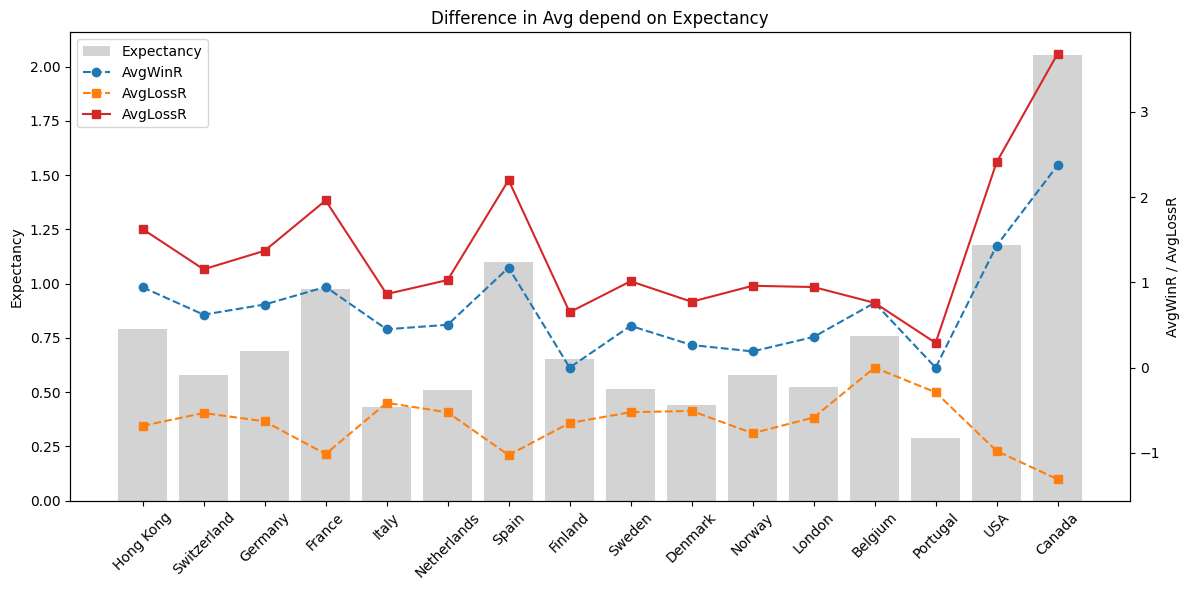

In [14]:
x = np.arange(len(df3['Market']))
fig, ax1 = plt.subplots(figsize=(12, 6))
bar = ax1.bar(x, df3['Expectancy'], color='lightgray', label='Expectancy')
ax1.set_ylabel('Expectancy')
ax1.set_xticks(x)
ax1.set_xticklabels(df3['Market'], rotation=45)
ax2 = ax1.twinx()
line1, = ax2.plot(x, df3['AvgWinR'], marker='o', label='AvgWinR', color='tab:blue',linestyle='--')
line2, = ax2.plot(x, df3['AvgLossR'], marker='s', label='AvgLossR', color='tab:orange',linestyle='--')
line3, = ax2.plot(x,df3['AvgWinR']-df3['AvgLossR'], marker='s', label='AvgLossR', color='tab:red')
ax2.set_ylabel('AvgWinR / AvgLossR')
lines = [bar, line1, line2, line3]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')
plt.title('Difference in Avg depend on Expectancy')
plt.tight_layout()
plt.show()

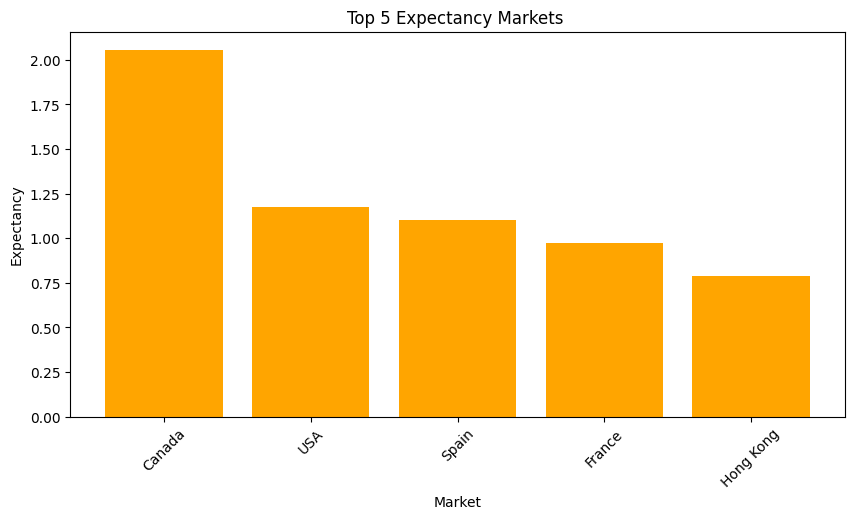

In [15]:
df3_f=df3[['Market','Hit Ratio','Expectancy']]
df3_sorted=df3_f.sort_values(by='Expectancy', ascending=False).head(5).reset_index(drop=True)

plt.figure(figsize=(10,5))
plt.bar(df3_sorted['Market'],df3_sorted['Expectancy'], color='orange')
plt.xlabel('Market')
plt.ylabel('Expectancy')
plt.title('Top 5 Expectancy Markets ')
plt.tight_layout
plt.xticks(rotation=45)
plt.show()

In [16]:
df3_sorted.head()

,Market,Hit Ratio,Expectancy
0,Canada,0.70,2.05
1,USA,0.44,1.18
2,Spain,0.50,1.10
3,France,0.59,0.97
4,Hong Kong,0.41,0.79


* Canada has high expectancy with high hit ratio(70%0, means market is the most stable to invest.

In [18]:
print(df3.head())

        Market  Win  Loss  AvgWinR  AvgLossR  Hit Ratio  Loss Ratio  \
0    Hong Kong   34    49     0.94     -0.68       0.41        0.59   
1  Switzerland    8     8     0.62     -0.53       0.50        0.50   
2      Germany   25    21     0.74     -0.63       0.54        0.46   
3       France   10     7     0.95     -1.01       0.59        0.41   
4        Italy    3     3     0.45     -0.41       0.50        0.50   

   Expectancy  
0        0.79  
1        0.58  
2        0.69  
3        0.97  
4        0.43  


In [21]:
#Select colunms
df3_cols = df3[['AvgWinR', 'AvgLossR', 'Hit Ratio', 'Expectancy']]
corr_matrix = df3_cols.corr()


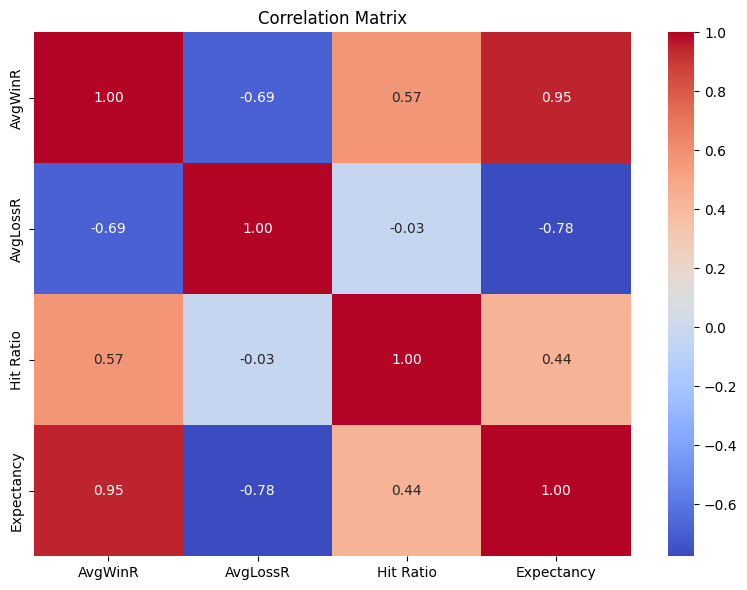

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

* Strong correlation
   - Average Win R : Positive correlation. bigger absolute value, bigger Expectancy
   - Average Loss R : Negative correlation. bigger absolute value, lower Expectancy
* Week correlation
   - Hit Ratio : (around 0.3) weeker correlation than Win/Loss R